In [2]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 18kB/s 
     |████████████████████████████████| 501kB 9.6MB/s 
     |████████████████████████████████| 4.3MB 47.0MB/s 


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [0]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [6]:
print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [10]:
data = pd.read_csv('//content/Movies-Poster_Dataset/train.csv')
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [11]:
data.shape

(7254, 27)

In [12]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:32<00:00, 220.36it/s]


In [13]:
X.shape

(7254, 350, 350, 3)

In [14]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

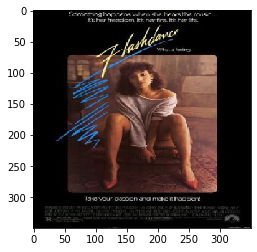

In [15]:
plt.imshow(X[1])

In [16]:
y=data.drop(['Id','Genre'],axis=1)
y=y.to_numpy()
y.shape

(7254, 25)

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state = 0,test_size=0.15)

In [18]:
X_train[0].shape

(350, 350, 3)

##BUILD CNN MODEL

In [0]:
model=Sequential()

model.add(Conv2D(16,(3,3),activation='relu',input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,( 3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

##COMPILE MODEL

In [0]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

##FIT MODEL

In [22]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
6165/6165 [==============================] - 202s 33ms/sample - loss: 0.6927 - accuracy: 0.6475 - val_loss: 0.4355 - val_accuracy: 0.8530
Epoch 2/5
6165/6165 [==============================] - 202s 33ms/sample - loss: 0.3111 - accuracy: 0.8913 - val_loss: 0.2724 - val_accuracy: 0.9067
Epoch 3/5
6165/6165 [==============================] - 203s 33ms/sample - loss: 0.2604 - accuracy: 0.9071 - val_loss: 0.2607 - val_accuracy: 0.9066
Epoch 4/5
6165/6165 [==============================] - 206s 33ms/sample - loss: 0.2515 - accuracy: 0.9095 - val_loss: 0.2516 - val_accuracy: 0.9067
Epoch 5/5
6165/6165 [==============================] - 209s 34ms/sample - loss: 0.2449 - accuracy: 0.9115 - val_loss: 0.2436 - val_accuracy: 0.9088


In [23]:
history.history

{'accuracy': [0.6475005, 0.89130914, 0.90708834, 0.9095412, 0.91151977],
 'loss': [0.6927083144174392,
  0.3111238349769914,
  0.2603598124886178,
  0.25147359414692344,
  0.24486649706415886],
 'val_accuracy': [0.8530396, 0.9067034, 0.90659326, 0.9067401, 0.9087971],
 'val_loss': [0.435450170048888,
  0.2723766520441509,
  0.26070979024096297,
  0.2515906924441717,
  0.243558173036225]}

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

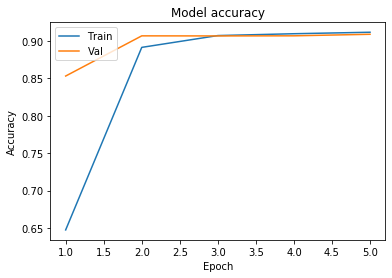

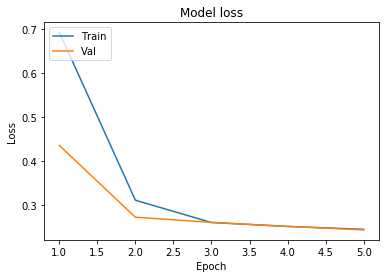

In [25]:
plot_learningCurve(history,5)

##Model Testing

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Comedy
Romance


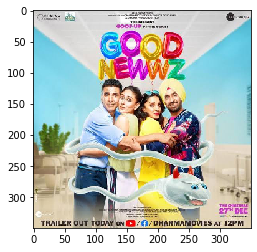

In [27]:
img = image.load_img('/content/Movies-Poster_Dataset/good_news.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])